# Facebook Messenger Stats!

In [1]:
%matplotlib inline

import stats, message_parser, os
import datetime

#create path for csv files to be saved
if not os.path.exists('.\\csv files'):
	os.mkdir('.\\csv files\\')

**Parse all your data into a dict to be manipulated**

This may take a while! Takes about 30s to parse 500 MB of chat data

In [2]:
chat_dict = message_parser.parse() #parses all by default. can parse single html files

# Who do you talk to most?

First, let's find your chats with the most messages!
getMostMessaged takes 2 arguments: dict of your chats and how many chats to display

In [3]:
df_most_messaged = stats.getMostMessaged(chat_dict, 10)
df_most_messaged

,% of total messages,chat,number of messages,rank
0,14.651932,Kanye West,66386,1
1,8.084981,Tim Horton,36632,2
2,7.705584,Ghandi,34913,3
3,7.628557,Elon Musk,34564,4
4,6.329469,Ira Glass,28678,5
5,5.805949,Simon Wong,26306,6
6,5.567805,Mark Zuckerberg,25227,7
7,3.421859,Queen Elizabeth,15504,8
8,2.835879,Beyonce,12849,9
9,1.984166,Aubrey Graham,8990,10


Now let's plot this data:

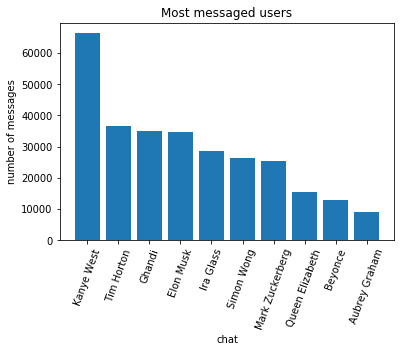

In [4]:
x = 'chat'
y = 'number of messages' #or plot '% of total messages'
data = df_most_messaged
plot_title = 'Most messaged users'
stats.plot(x,y, data, plot_title)

# When are you procrastinating the most?

Now let's look at your most active times on Facebook Messenger: 

We can compare most active time, minute, hour, day, month, or year using stats.getMostActiveTime

However, the most active minute, day and time are usually boring.


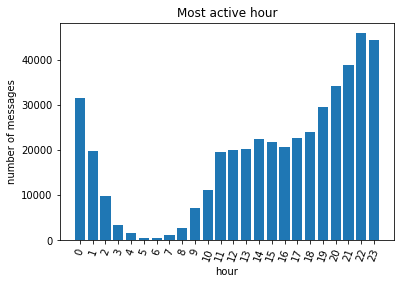

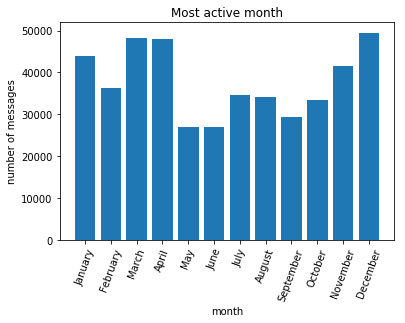

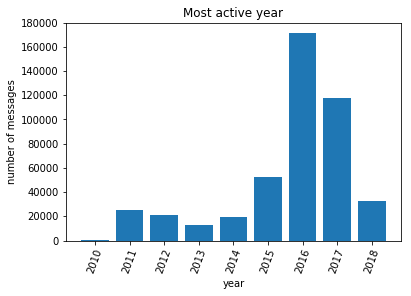

In [5]:
#stats.getMostActiveTime takes arguments chat dictionary, number of items to display ('max' to display all), type of time

df_hour = stats.getMostActiveTime(chat_dict, 'max', "hour")
df_hour = df_hour.sort_values('hour', ascending=True)

df_year = stats.getMostActiveTime(chat_dict,'max', "year")
df_year = df_year.sort_values('year', ascending=True)

df_month = stats.getMostActiveTime(chat_dict, 12, "month")
months = {datetime.datetime(2000,i,1).strftime("%B"): i for i in range(1, 13)}
df_month["month_number"] = df_month["month"].map(months)
df_month = df_month.sort_values('month_number', ascending=True)

stats.plot('hour','number of messages', df_hour, 'Most active hour')
stats.plot('month','number of messages', df_month, 'Most active month')
stats.plot('year','number of messages', df_year, 'Most active year')

# What are you sending to people?

What are your most sent words? Let's find out:


In [6]:
topNum = 10 #how many words to display (i.e. topNum = 10 displays top 10 words)
chars = 2 #the minimum length of the words, single letter words are boring!
sender = 'Simon Wong' #can use any name to find the most used words from a certain sender. or 'ANY_SENDER' for any sender
df_words = stats.getMostUsedWords(chat_dict, topNum, sender, chars)
df_words



,% of total messages,number of uses,rank,word
0,8.052858,14016,1,the
1,7.365700,12820,2,to
2,6.538926,11381,3,lol
3,5.312841,9247,4,it
4,5.190463,9034,5,you
5,4.463660,7769,6,and
6,4.386670,7635,7,is
7,3.567940,6210,8,for
8,3.386383,5894,9,that
9,3.259983,5674,10,like


# How are you communicating?

See your breakdown between text, image, video and stickers!

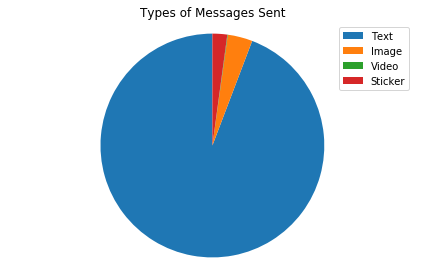

In [7]:
stats.typesOfMessages(chat_dict, 'Simon Wong')